# Experiment data using Minitown and MiniCPS. Attack on PLC2
This notebook has the results running cyber security experiments using MiniCPS, WNTR, and the Minitown topology. The attack in this notebook is an attack on PLC2. In this attack, an attacker takes control of the PLC2. When the attack is active, the PLC2 will ignore changes in the system and maintain the last command sent to the pumps P1 and P2. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Baseline simulation using WNTR and no minicps (works)
no_minicps_data = pd.read_csv('no_minicps.csv')
demand_driven_no_attack = pd.read_csv('../ICS_topologies/minitown_topology/demand_driven_data/no_attack/physical_process.csv')
demand_driven_attack_plc2 = pd.read_csv('../ICS_topologies/minitown_topology/demand_driven_data/attack_plc2/physical_process.csv')

scada_demand_driven_no_attack = pd.read_csv('../ICS_topologies/minitown_topology/demand_driven_data/no_attack/scada_saved_tank_levels_received.csv')
scada_demand_driven_attack_plc2 = pd.read_csv('../ICS_topologies/minitown_topology/demand_driven_data/attack_plc2/scada_saved_tank_levels_received.csv')

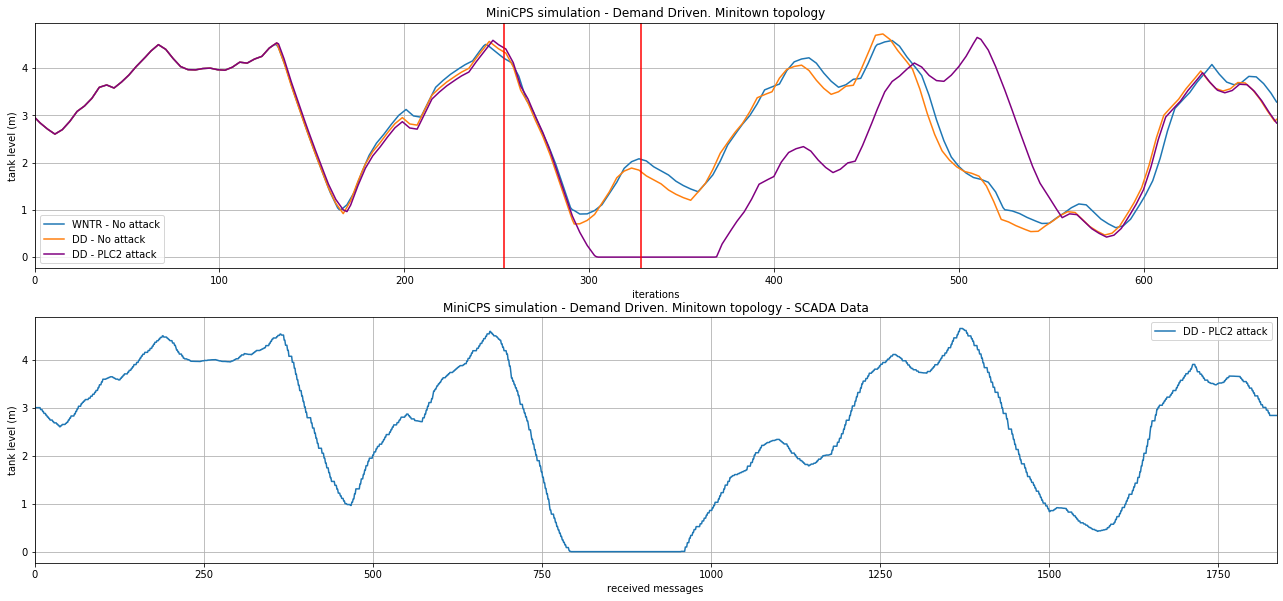

In [9]:
dd = plt.subplot(2,1,1)
no_minicps_data["TANK_LEVEL"].plot(label='WNTR - No attack', ax=dd)
demand_driven_no_attack["TANK_LEVEL"].plot(label='DD - No attack', ax=dd)
demand_driven_attack_plc2["TANK_LEVEL"].plot(label='DD - PLC2 attack', ax=dd, color="Purple")
plt.axvline(x=254, color="red")
plt.axvline(x=328, color="red")
plt.title("MiniCPS simulation - Demand Driven. Minitown topology")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

dd = plt.subplot(2,1,2)
scada_demand_driven_attack_plc2["TANK_LEVEL"].plot(label='DD - PLC2 attack', ax=dd)
plt.title("MiniCPS simulation - Demand Driven. Minitown topology - SCADA Data")
plt.xlabel('received messages')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

In the figure above, the time between the red lines indicates the time in which the attack on PLC2 is active. During this attack, the PLC2 does not send any command to the pumps

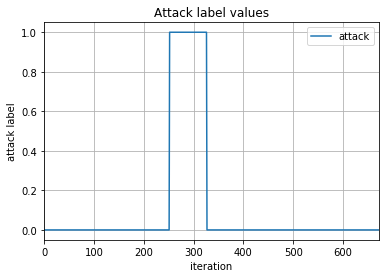

In [10]:
demand_driven_attack_plc2['Attack#01'].plot()

plt.legend(['attack','no attack'])
plt.title('Attack label values')
ax = plt.gca()
ax.set_xlabel("iteration")
ax.set_ylabel("attack label")
plt.grid(True)

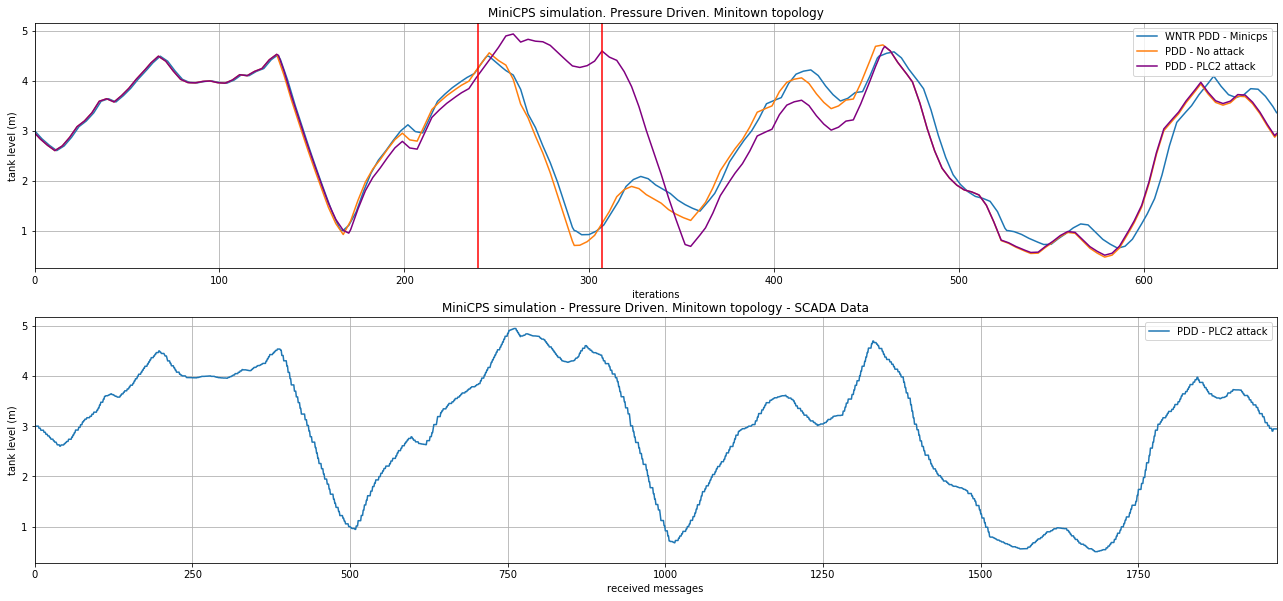

In [12]:
# Baseline simulation using WNTR and no minicps (works)
no_minicps_data_pdd = pd.read_csv('no_minicps_pdd.csv')
pressure_driven_no_attack = pd.read_csv('../ICS_topologies/minitown_topology/demand_driven_data/no_attack/physical_process.csv')
pressure_driven_attack_plc2 = pd.read_csv('../ICS_topologies/minitown_topology/pressure_driven_data/attack_plc2/physical_results.csv')

scada_pressure_driven_no_attack = pd.read_csv('../ICS_topologies/minitown_topology/demand_driven_data/no_attack/scada_saved_tank_levels_received.csv')
scada_pressure_driven_attack_plc2 = pd.read_csv('../ICS_topologies/minitown_topology/pressure_driven_data/attack_plc2/scada_saved_tank_levels_received.csv')

dd = plt.subplot(2,1,1)
no_minicps_data_pdd["TANK_LEVEL"].plot(label='WNTR PDD - Minicps', ax=dd)
pressure_driven_no_attack["TANK_LEVEL"].plot(label='PDD - No attack', ax=dd)
pressure_driven_attack_plc2["TANK_LEVEL"].plot(label='PDD - PLC2 attack', ax=dd, color="purple")

plt.axvline(x=240, color="red")
plt.axvline(x=307, color="red")
plt.title("MiniCPS simulation. Pressure Driven. Minitown topology")
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

dd = plt.subplot(2,1,2)
scada_pressure_driven_attack_plc2["TANK_LEVEL"].plot(label='PDD - PLC2 attack', ax=dd)
plt.title("MiniCPS simulation - Pressure Driven. Minitown topology - SCADA Data")
plt.xlabel('received messages')
plt.ylabel('tank level (m)')
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)


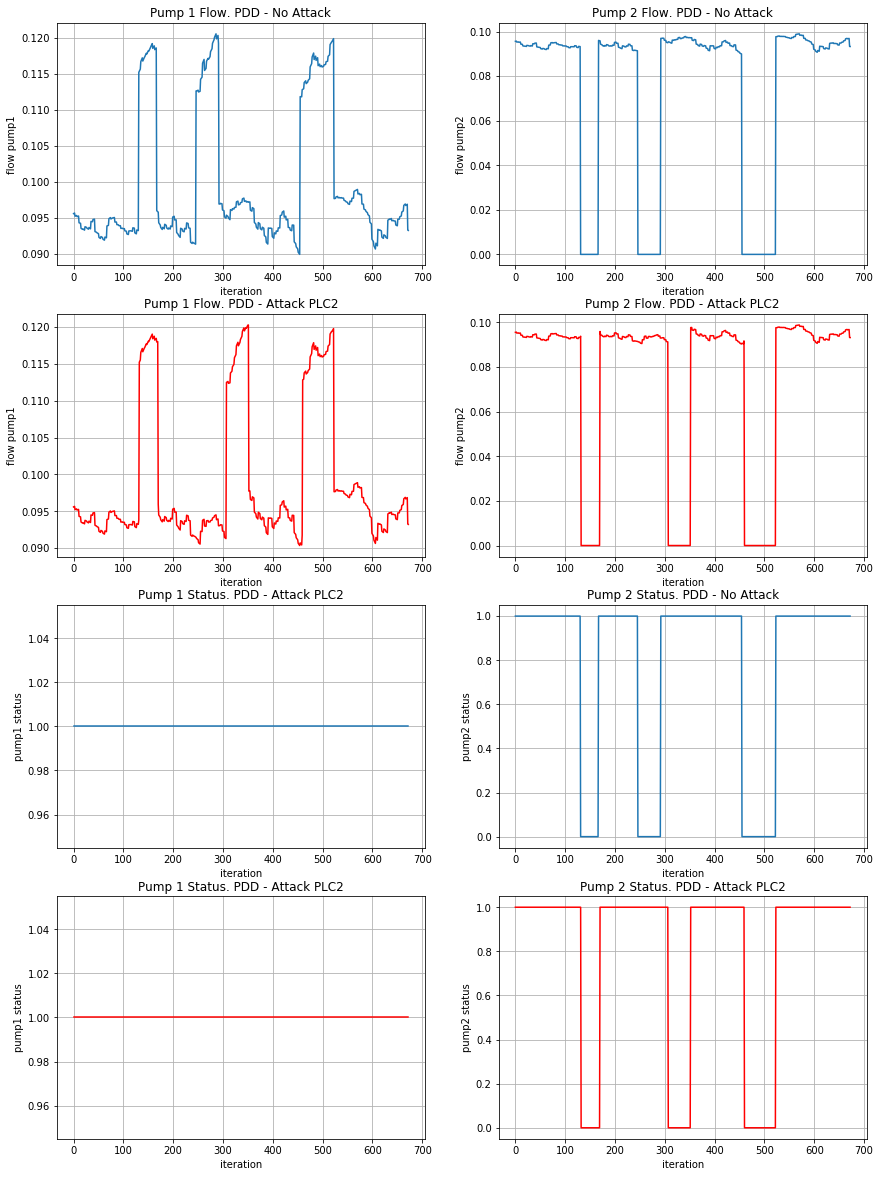

In [13]:
fp1 = pressure_driven_no_attack['FLOW_PUMP1']
fp2 = pressure_driven_no_attack['FLOW_PUMP2']
sp1 = pressure_driven_no_attack['STATUS_PUMP1']
sp2 = pressure_driven_no_attack['STATUS_PUMP2']

fp1_attack = pressure_driven_attack_plc2['FLOW_PUMP1']
fp2_attack = pressure_driven_attack_plc2['FLOW_PUMP2']
sp1_attack = pressure_driven_attack_plc2['STATUS_PUMP1']
sp2_attack = pressure_driven_attack_plc2['STATUS_PUMP2']

plt.subplot(421)
plt.plot(fp1)
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. PDD - No Attack')
plt.grid(True)

plt.subplot(422)
plt.plot(fp2)
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. PDD - No Attack')
plt.grid(True)

plt.subplot(423)
plt.plot(fp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. PDD - Attack PLC2')
plt.grid(True)

plt.subplot(424)
plt.plot(fp2_attack,color="red")
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. PDD - Attack PLC2')
plt.grid(True)

plt.subplot(425)
plt.plot(sp1)
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. PDD - Attack PLC2')
plt.grid(True)

plt.subplot(426)
plt.plot(sp2)
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. PDD - No Attack')
plt.grid(True)

plt.subplot(427)
plt.plot(sp1_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump1 status')
plt.title('Pump 1 Status. PDD - Attack PLC2')
plt.grid(True)

plt.subplot(428)
plt.plot(sp2_attack, color="red")
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.title('Pump 2 Status. PDD - Attack PLC2')
plt.grid(True)


plt.subplots_adjust(top=4.00, right=2.00)

plt.show()